# Importing the Data

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("car.data")
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [16]:
# Adding column labels
df.columns = ["buying_price", "maintenance", "doors", "persons", "lug_boot", "safety", "class_value"]
df.head()

,buying_price,maintenance,doors,persons,lug_boot,safety,class_value
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [17]:
df.shape

(1727, 7)

# Exploratory Data Analysis and Preprocessing

In [18]:
# Checking for any null values
df.isnull().sum()

buying_price    0
maintenance     0
doors           0
persons         0
lug_boot        0
safety          0
class_value     0
dtype: int64

In [19]:
# Checking the distribution of every data column
for col in list(df):
    print(df[col].value_counts())   

med      432
low      432
high     432
vhigh    431
Name: buying_price, dtype: int64
med      432
low      432
high     432
vhigh    431
Name: maintenance, dtype: int64
3        432
5more    432
4        432
2        431
Name: doors, dtype: int64
more    576
4       576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class_value, dtype: int64


In [20]:
X = df.drop(['buying_price', 'persons'], axis=1)
y = df[['buying_price']]

In [21]:
y.value_counts()

buying_price
med             432
low             432
high            432
vhigh           431
dtype: int64

In [22]:
X.head()

,maintenance,doors,lug_boot,safety,class_value
0,vhigh,2,small,med,unacc
1,vhigh,2,small,high,unacc
2,vhigh,2,med,low,unacc
3,vhigh,2,med,med,unacc
4,vhigh,2,med,high,unacc


In [23]:
X['class_value'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class_value, dtype: int64

In [24]:
def maintenance_safety_encode(data):
    if data == "low":
        return 1
    elif data == "med":
        return 2
    elif data == "high":
        return 3
    elif data == "vhigh":
        return 4
    
def lug_encode(data):
    if data == "small":
        return 1
    elif data == "med":
        return 2
    elif data == "big":
        return 3
    
def lug_encode(data):
    if data == "small":
        return 1
    elif data == "med":
        return 2
    elif data == "big":
        return 3
    
def door_encode(data):
    if data == "2":
        return 1
    elif data == "3":
        return 2
    elif data == "4":
        return 3
    elif data == "5more":
        return 4
    
def class_encode(data):
    if data == "unacc":
        return 1
    elif data == "acc":
        return 2
    elif data == "good":
        return 3
    elif data == "vgood":
        return 4

In [25]:
X.columns

Index(['maintenance', 'doors', 'lug_boot', 'safety', 'class_value'], dtype='object')

In [26]:
X['maintenance'] = X['maintenance'].apply(maintenance_safety_encode)
X['doors'] = X['doors'].apply(door_encode)
X['lug_boot'] = X['lug_boot'].apply(lug_encode)
X['safety'] = X['safety'].apply(maintenance_safety_encode)
X['class_value'] = X['class_value'].apply(class_encode)
X.head()

,maintenance,doors,lug_boot,safety,class_value
0,4,1,1,2,1
1,4,1,1,3,1
2,4,1,2,1,1
3,4,1,2,2,1
4,4,1,2,3,1


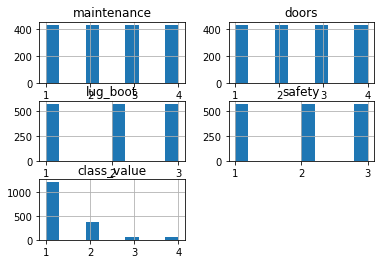

In [27]:
X.hist()
plt.show()

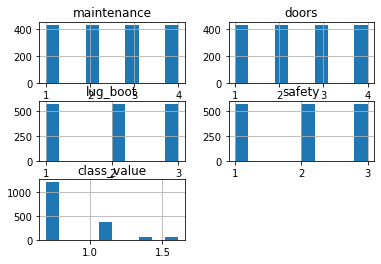

In [28]:
import numpy as np

X['class_value'] = X['class_value'].apply(lambda x: np.log(x+1))
X.hist()

plt.show()

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=list(X))

X.describe()

,maintenance,doors,lug_boot,safety,class_value
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000
mean,0.499710,0.500290,0.500290,0.500290,0.166253
std,0.372699,0.372699,0.408307,0.408307,0.276485
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.333333,0.000000,0.000000,0.000000
50%,0.333333,0.666667,0.500000,0.500000,0.000000
75%,0.666667,0.833333,1.000000,1.000000,0.442507
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 80% training and 20% test


# Base Models

In [34]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 100)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/Users/zentan/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [36]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score", f1_score(y_test, y_pred, average="macro"))
print("Precision", precision_score(y_test, y_pred, average="macro"))
print("Recall", recall_score(y_test, y_pred, average="macro"))

Accuracy: 0.3140655105973025
F1 Score 0.24243704045473213
Precision 0.2565921977627258
Recall 0.3182764284061994


### KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred_knn = classifier.predict(X_test)

/Users/zentan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [40]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score", f1_score(y_test, y_pred, average="macro"))
print("Precision", precision_score(y_test, y_pred, average="macro"))
print("Recall", recall_score(y_test, y_pred, average="macro"))

Accuracy: 0.3140655105973025
F1 Score 0.24243704045473213
Precision 0.2565921977627258
Recall 0.3182764284061994


# Using pycaret to speed up the process

In [41]:
df_pycaret = pd.read_csv("car.data")
df_pycaret.columns = ["buying_price", "maintenance", "doors", "persons", "lug_boot", "safety", "class_value"]
df_pycaret.drop("persons", axis=1, inplace=True)
df_pycaret.head()

,buying_price,maintenance,doors,lug_boot,safety,class_value
0,vhigh,vhigh,2,small,med,unacc
1,vhigh,vhigh,2,small,high,unacc
2,vhigh,vhigh,2,med,low,unacc
3,vhigh,vhigh,2,med,med,unacc
4,vhigh,vhigh,2,med,high,unacc


In [42]:
from pycaret.classification import * 

clf = setup(df_pycaret, target='buying_price', session_id=1)

,Description,Value
0,session_id,1
1,Target,buying_price
2,Target Type,Multiclass
3,Label Encoded,"high: 0, low: 1, med: 2, vhigh: 3"
4,Original Data,"(1727, 6)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [43]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.3179,0.5404,0.3180,0.3047,0.2500,0.0900,0.1123,0.1650
ada,Ada Boost Classifier,0.3162,0.5757,0.3153,0.3701,0.3063,0.0863,0.0903,0.0240
ridge,Ridge Classifier,0.3129,0.0000,0.3123,0.3435,0.2963,0.0824,0.0875,0.0050
lda,Linear Discriminant Analysis,0.3121,0.5750,0.3111,0.3702,0.2985,0.0808,0.0855,0.0060
lr,Logistic Regression,0.3055,0.5763,0.3050,0.3311,0.2925,0.0726,0.0764,0.6340
svm,SVM - Linear Kernel,0.2848,0.0000,0.2844,0.2906,0.2422,0.0454,0.0572,0.1520
gbc,Gradient Boosting Classifier,0.2583,0.5740,0.2586,0.2818,0.2581,0.0100,0.0097,0.0770
qda,Quadratic Discriminant Analysis,0.2517,0.0000,0.2500,0.0633,0.1012,0.0000,0.0000,0.0160
knn,K Neighbors Classifier,0.1963,0.4402,0.1965,0.1978,0.1934,-0.0719,-0.0726,0.1890
lightgbm,Light Gradient Boosting Machine,0.1871,0.4956,0.1877,0.1906,0.1864,-0.0842,-0.0849,2.5250


GaussianNB(priors=None, var_smoothing=1e-09)

In [44]:
model = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3388,0.5487,0.3417,0.3347,0.2804,0.1209,0.1529
1,0.2975,0.5287,0.3000,0.3278,0.2266,0.0659,0.0847
2,0.2479,0.4794,0.2500,0.3039,0.1917,0.0000,0.0000
3,0.2975,0.5281,0.3000,0.2923,0.2195,0.0659,0.0872
4,0.3223,0.5242,0.3241,0.3308,0.2774,0.0959,0.1106
5,0.3223,0.5429,0.3156,0.2422,0.2231,0.0899,0.1207
6,0.3636,0.6000,0.3621,0.3274,0.3068,0.1471,0.1786
7,0.3140,0.5295,0.3087,0.2793,0.2437,0.0791,0.1000
8,0.3167,0.5451,0.3181,0.2925,0.2467,0.0896,0.1093
9,0.3583,0.5777,0.3601,0.3160,0.2838,0.1452,0.1793


In [48]:
tuned_nb = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3388,0.5487,0.3417,0.3347,0.2804,0.1209,0.1529
1,0.2975,0.5287,0.3000,0.3278,0.2266,0.0659,0.0847
2,0.2479,0.4794,0.2500,0.3039,0.1917,0.0000,0.0000
3,0.2975,0.5281,0.3000,0.2923,0.2195,0.0659,0.0872
4,0.3223,0.5242,0.3241,0.3308,0.2774,0.0959,0.1106
5,0.3223,0.5429,0.3156,0.2422,0.2231,0.0899,0.1207
6,0.3636,0.6000,0.3621,0.3274,0.3068,0.1471,0.1786
7,0.3140,0.5295,0.3087,0.2793,0.2437,0.0791,0.1000
8,0.3167,0.5451,0.3181,0.2925,0.2467,0.0896,0.1093
9,0.3583,0.5777,0.3601,0.3160,0.2838,0.1452,0.1793


In [49]:

test = pd.DataFrame([['High', '4', 'Big', 'High', 'Good']])
test.columns = ["maintenance", "doors", "lug_boot", "safety", "class_value"]


test.head()

,maintenance,doors,lug_boot,safety,class_value
0,High,4,Big,High,Good


In [50]:
unseen_predictions = predict_model(tuned_nb, data=test)
unseen_predictions.head()

,maintenance,doors,lug_boot,safety,class_value,Label,Score
0,High,4,Big,High,Good,low,0.9841


***The predicted Buying Price would be low*** 